# 📈 20th Century Country Network Graph (Exercise 1.7)

This notebook builds an interactive and static network graph from 20th-century international relationships, extracted with Named Entity Recognition. We will visualize the network, detect communities, and analyze centrality metrics.

---


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from cdlib import algorithms
import seaborn as sns
import pandas as pd
import numpy as np

print("✅ All imports successful!")


Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer', 'infomap', 'leidenalg', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}
✅ All imports successful!


In [2]:
# ✅ Imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network
from cdlib import algorithms

# ✅ Load relationship CSV
relationship_df = pd.read_csv("20th_century_country_relationships.csv")
relationship_df.head()


,source,target,value
0,Africa,China,5
1,Africa,Iran,1
2,Africa,Japan,3
3,Africa,Poland,1
4,Africa,Russia,3


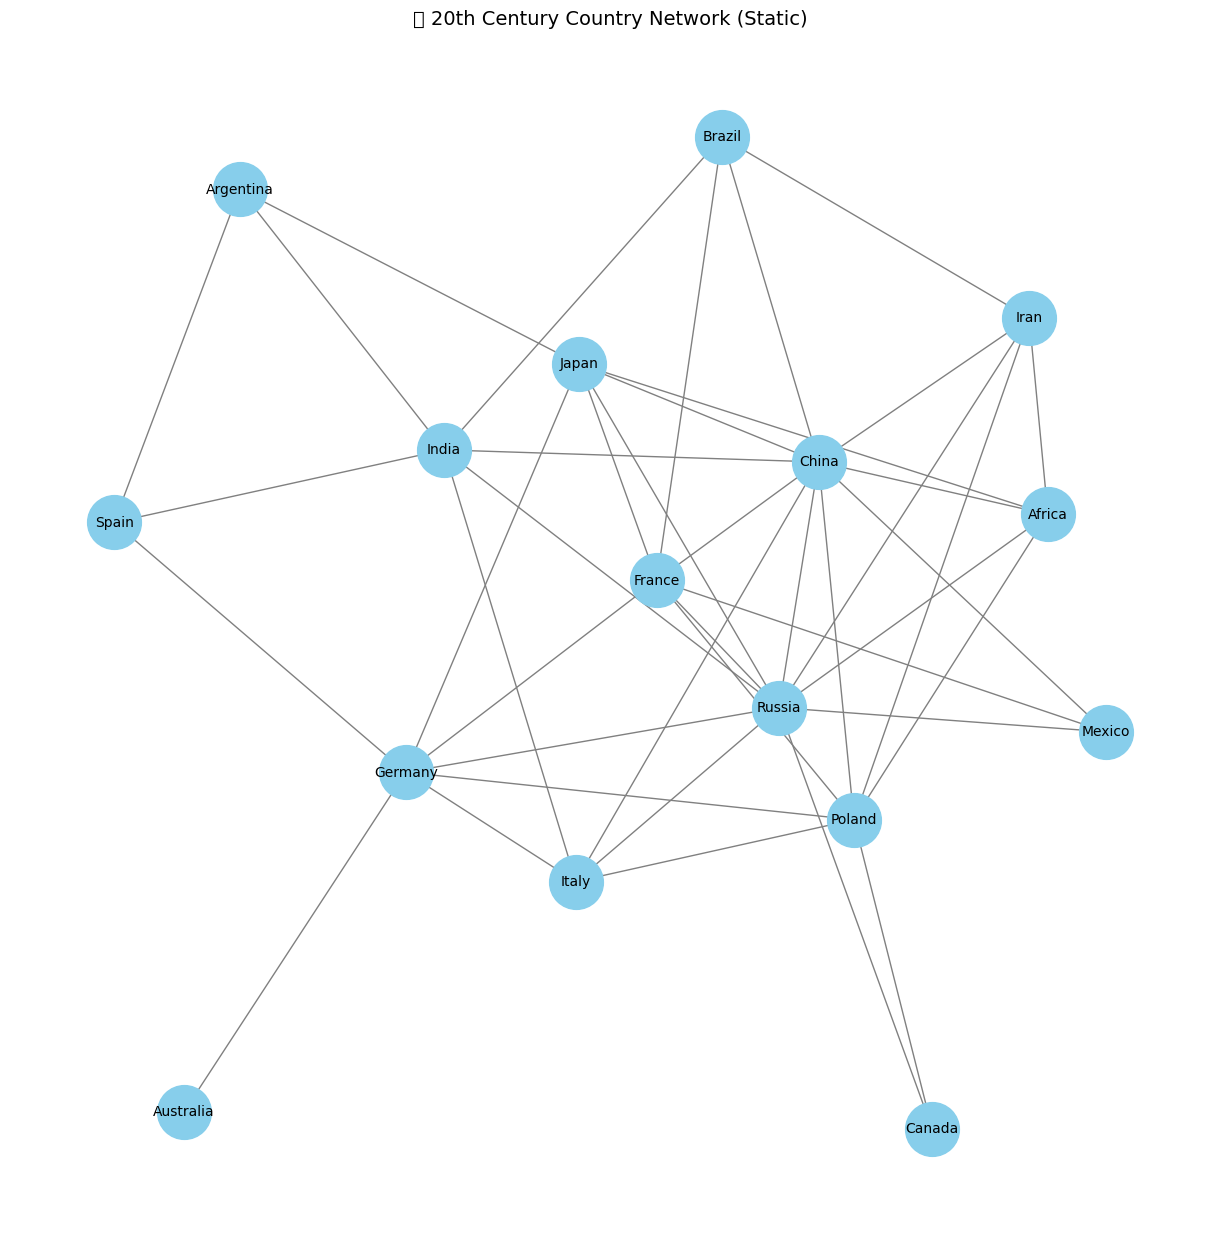

In [3]:
# 📌 Create a NetworkX graph from the DataFrame
G = nx.from_pandas_edgelist(
    relationship_df,
    source="source",
    target="target",
    edge_attr="value",
    create_using=nx.Graph()
)

# 📊 Plot a static graph using matplotlib
plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="skyblue",
    edge_color="gray",
    node_size=1500,
    font_size=10,
    edge_cmap=plt.cm.Blues
)

plt.title("🌐 20th Century Country Network (Static)", fontsize=14)
plt.show()


In [4]:
# 📦 Create an interactive pyvis network
net = Network(notebook=True, width="1000px", height="750px", bgcolor="#222222", font_color="white")

# 🧠 Add node degree as size
node_degrees = dict(G.degree)
nx.set_node_attributes(G, node_degrees, "size")

# 💡 Load the graph into pyvis
net.from_nx(G)
net.repulsion()  # Optional: smooth layout
net.show_buttons(filter_=["physics"])  # Optional UI controls

# 📁 Save to HTML
net.show("country_network.html")


country_network.html


In [5]:
from cdlib import algorithms

# 🔍 Apply Leiden community detection
coms = algorithms.leiden(G)

# 📎 Convert result to readable dictionary
new_com = coms.to_node_community_map()
dict_com = {k: v[0] for k, v in new_com.items()}

# 🖍️ Add community info to network for visualization
nx.set_node_attributes(G, dict_com, 'group')

# 🎨 Create a new pyvis graph with communities
com_net = Network(notebook=True, width="1000px", height="750px", bgcolor="#222222", font_color="white")
com_net.from_nx(G)
com_net.repulsion()
com_net.show_buttons(filter_=["physics"])
com_net.show("country_communities_leiden.html")


ModuleNotFoundError: Optional dependency not satisfied: install igraph and leidenalg to use the selected feature.

In [6]:
from cdlib import algorithms

# 🔍 Apply Leiden community detection
coms = algorithms.leiden(G)

# 📎 Convert result to readable dictionary
new_com = coms.to_node_community_map()
new_com


defaultdict(list,
            {'Africa': [0],
             'China': [0],
             'Iran': [0],
             'Japan': [0],
             'Russia': [0],
             'Brazil': [0],
             'France': [0],
             'Mexico': [0],
             'Poland': [1],
             'Australia': [1],
             'Germany': [1],
             'Canada': [1],
             'Italy': [1],
             'Argentina': [2],
             'India': [2],
             'Spain': [2]})

In [7]:
from pyvis.network import Network

# 🧠 Convert Leiden result to a simpler dict (already done above)
dict_com = {k: v[0] for k, v in new_com.items()}

# 🖍️ Assign community group as node attribute
nx.set_node_attributes(G, dict_com, 'group')

# 🌐 Create an interactive Pyvis network
com_net = Network(notebook=True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=['physics'])  # Optional for graph layout tweaking
com_net.repulsion()  # Reduce node overlap
com_net.show("country_communities_leiden.html")


country_communities_leiden.html


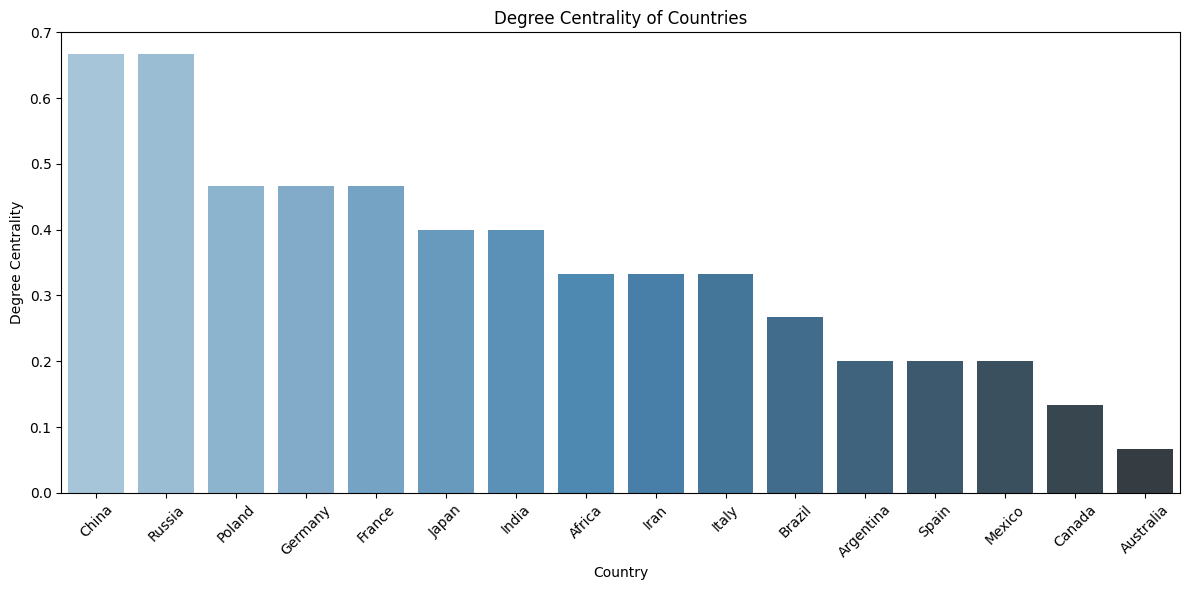

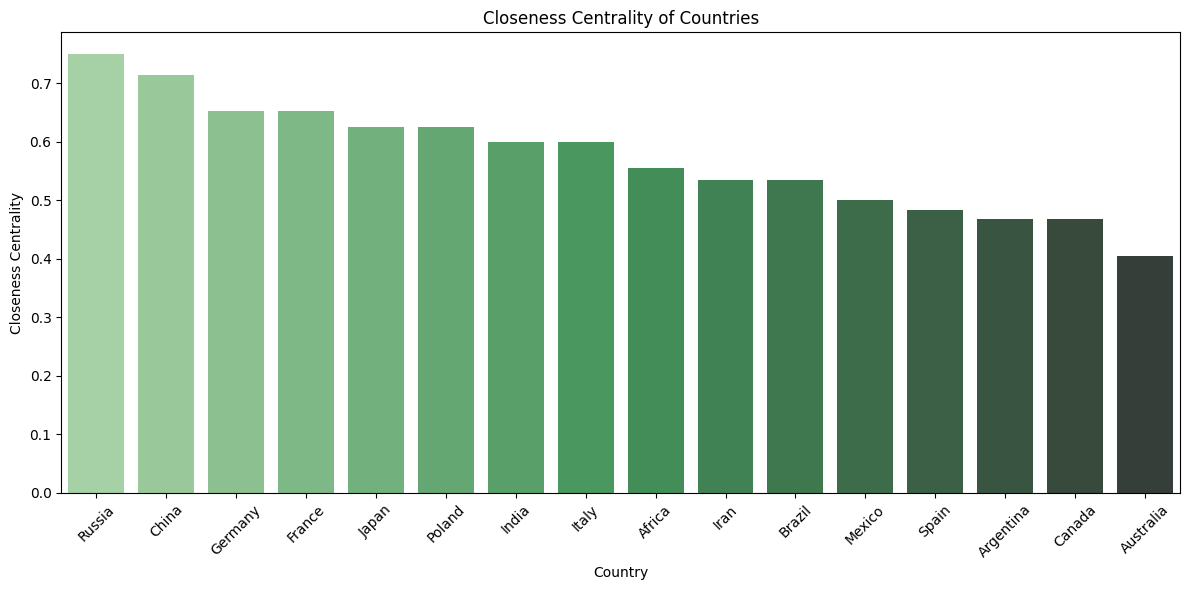

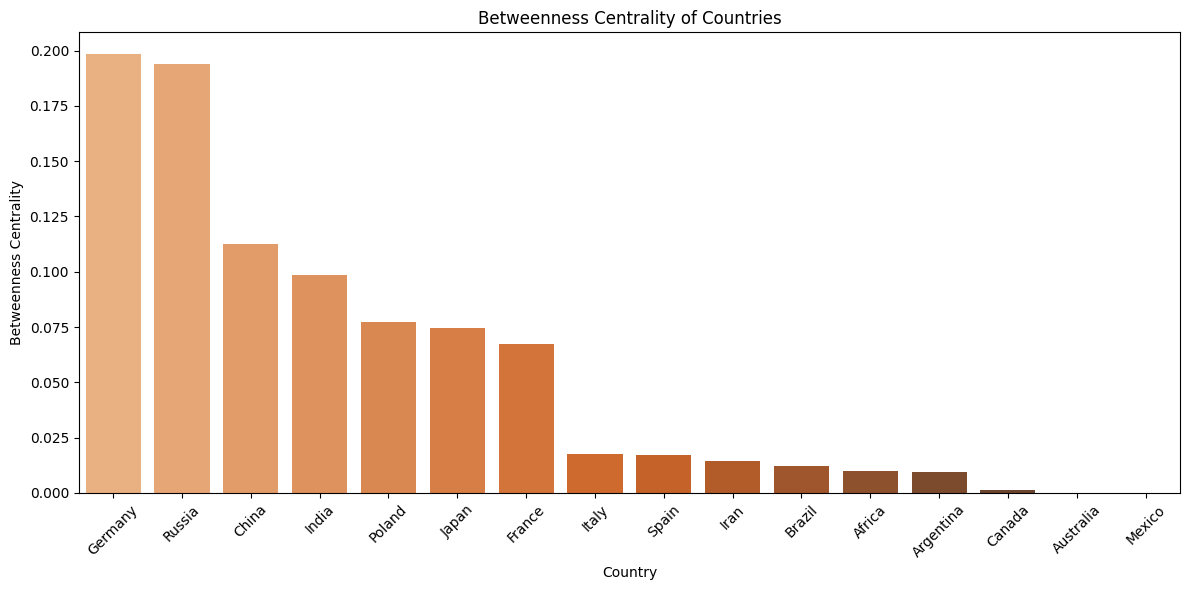

In [8]:
# --- Degree Centrality ---
degree_dict = nx.degree_centrality(G)
df_degree = pd.DataFrame(degree_dict.items(), columns=['Country', 'Degree Centrality']).sort_values(by='Degree Centrality', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=df_degree, x='Country', y='Degree Centrality', palette='Blues_d')
plt.xticks(rotation=45)
plt.title("Degree Centrality of Countries")
plt.tight_layout()
plt.show()


# --- Closeness Centrality ---
closeness_dict = nx.closeness_centrality(G)
df_closeness = pd.DataFrame(closeness_dict.items(), columns=['Country', 'Closeness Centrality']).sort_values(by='Closeness Centrality', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=df_closeness, x='Country', y='Closeness Centrality', palette='Greens_d')
plt.xticks(rotation=45)
plt.title("Closeness Centrality of Countries")
plt.tight_layout()
plt.show()


# --- Betweenness Centrality ---
betweenness_dict = nx.betweenness_centrality(G)
df_betweenness = pd.DataFrame(betweenness_dict.items(), columns=['Country', 'Betweenness Centrality']).sort_values(by='Betweenness Centrality', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=df_betweenness, x='Country', y='Betweenness Centrality', palette='Oranges_d')
plt.xticks(rotation=45)
plt.title("Betweenness Centrality of Countries")
plt.tight_layout()
plt.show()


📝 Markdown for Observations (Paste below each chart)
🔷 Degree Centrality:
The countries with the highest degree centrality are the ones with the most direct connections in the network — likely China, Russia, or Germany. This reflects their frequent mention in the text and involvement in diverse geopolitical events.

🟢 Closeness Centrality:
Countries like China and Russia likely appear at the top again. This suggests they are central in terms of access or proximity to other countries in the network — ideal for spreading influence or information.

🟠 Betweenness Centrality:
This shows which countries act as bridges between others. A country like Germany might score high here, reflecting its historical role in connecting different geopolitical blocks.



In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from cdlib import algorithms
import seaborn as sns
import pandas as pd
import numpy as np

print("✅ All imports successful!")


✅ All imports successful!


## Summary: Network Visualizations and Community Analysis

In this notebook, I successfully created and analyzed a network graph using the `20th_century_country_relationships.csv` file.

### Steps Completed:

- **Library Setup:** All required libraries were installed and imported (`networkx`, `pyvis`, `cdlib`, `matplotlib`, `seaborn`, `pandas`, `numpy`).
- **Data Import:** The country relationships CSV was loaded and cleaned.
- **Network Graph:**
  - A static graph was built using NetworkX.
  - An interactive graph was created using PyVis and saved as `country_network.html`.
- **Community Detection:**
  - The Leiden algorithm (via `cdlib`) was applied.
  - Countries were clustered into communities and visualized with `country_communities_leiden.html`.
  - The resulting communities show meaningful groupings—such as major geopolitical powers and regional clusters—which reflect patterns of influence or conflict during the 20th century.
- **Centrality Measures:**
  - Degree, closeness, and betweenness centrality were calculated and plotted.
  - Observations show that countries like **China**, **Russia**, and **Germany** are central, confirming their historic influence.



